In [1]:
import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values
import json # library to handle JSON files
# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 

from IPython.display import display_html
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import numpy as np
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

import folium # plotting library
from bs4 import BeautifulSoup
from sklearn.cluster import KMeans
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt
import seaborn as sns

print('Libraries imported.')

Libraries imported.


In [2]:
with open('newyork_data.json') as json_data:
    newyork_data = json.load(json_data)

In [3]:
newyork_data

{'type': 'FeatureCollection',
 'totalFeatures': 306,
 'features': [{'type': 'Feature',
   'id': 'nyu_2451_34572.1',
   'geometry': {'type': 'Point',
    'coordinates': [-73.84720052054902, 40.89470517661]},
   'geometry_name': 'geom',
   'properties': {'name': 'Wakefield',
    'stacked': 1,
    'annoline1': 'Wakefield',
    'annoline2': None,
    'annoline3': None,
    'annoangle': 0.0,
    'borough': 'Bronx',
    'bbox': [-73.84720052054902,
     40.89470517661,
     -73.84720052054902,
     40.89470517661]}},
  {'type': 'Feature',
   'id': 'nyu_2451_34572.2',
   'geometry': {'type': 'Point',
    'coordinates': [-73.82993910812398, 40.87429419303012]},
   'geometry_name': 'geom',
   'properties': {'name': 'Co-op City',
    'stacked': 2,
    'annoline1': 'Co-op',
    'annoline2': 'City',
    'annoline3': None,
    'annoangle': 0.0,
    'borough': 'Bronx',
    'bbox': [-73.82993910812398,
     40.87429419303012,
     -73.82993910812398,
     40.87429419303012]}},
  {'type': 'Feature',
 

In [4]:
neighborhoods_data = newyork_data['features']

In [5]:
neighborhoods_data[0]

{'type': 'Feature',
 'id': 'nyu_2451_34572.1',
 'geometry': {'type': 'Point',
  'coordinates': [-73.84720052054902, 40.89470517661]},
 'geometry_name': 'geom',
 'properties': {'name': 'Wakefield',
  'stacked': 1,
  'annoline1': 'Wakefield',
  'annoline2': None,
  'annoline3': None,
  'annoangle': 0.0,
  'borough': 'Bronx',
  'bbox': [-73.84720052054902,
   40.89470517661,
   -73.84720052054902,
   40.89470517661]}}

In [6]:
# define the dataframe columns
column_names = ['Borough', 'Neighborhood', 'Latitude', 'Longitude'] 

# instantiate the dataframe
neighborhoods = pd.DataFrame(columns=column_names)

In [7]:
for data in neighborhoods_data:
    borough = neighborhood_name = data['properties']['borough'] 
    neighborhood_name = data['properties']['name']
        
    neighborhood_latlon = data['geometry']['coordinates']
    neighborhood_lat = neighborhood_latlon[1]
    neighborhood_lon = neighborhood_latlon[0]
    
    neighborhoods = neighborhoods.append({'Borough': borough,
                                          'Neighborhood': neighborhood_name,
                                          'Latitude': neighborhood_lat,
                                          'Longitude': neighborhood_lon}, ignore_index=True)

In [8]:
neighborhoods

,Borough,Neighborhood,Latitude,Longitude
0,Bronx,Wakefield,40.894705,-73.847201
1,Bronx,Co-op City,40.874294,-73.829939
2,Bronx,Eastchester,40.887556,-73.827806
3,Bronx,Fieldston,40.895437,-73.905643
4,Bronx,Riverdale,40.890834,-73.912585
5,Bronx,Kingsbridge,40.881687,-73.902818
6,Manhattan,Marble Hill,40.876551,-73.910660
7,Bronx,Woodlawn,40.898273,-73.867315
8,Bronx,Norwood,40.877224,-73.879391
9,Bronx,Williamsbridge,40.881039,-73.857446


In [9]:
neighborhoods.shape

(306, 4)

In [10]:
print('The dataframe has {} boroughs and {} neighborhoods.'.format(
        len(neighborhoods['Borough'].unique()),
        neighborhoods.shape[0]
    )
)

The dataframe has 5 boroughs and 306 neighborhoods.


#### Use geopy library to get the latitude and longitude values of New York City.

In order to define an instance of the geocoder, we need to define a user_agent. We will name our agent <em>ny_explorer</em>, as shown below.

In [11]:
address = 'New York City, NY'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of New York City are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of New York City are 40.7127281, -74.0060152.


#### Create a map of New York with neighborhoods superimposed on top.

In [12]:
# create map of New York using latitude and longitude values
map_newyork = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(neighborhoods['Latitude'], neighborhoods['Longitude'], neighborhoods['Borough'], neighborhoods['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_newyork)  
    
map_newyork

### Using webscraping to get the demographic dataset from Wikipedia

In [13]:
source = requests.get('https://en.wikipedia.org/wiki/Demographics_of_New_York_City').text
soup=BeautifulSoup(source,'lxml')
print(soup.title)
tables = soup.findAll("table")
# there are 13 tables in this webpage and we only need the 6th table contains the race compositions in NYC.
tab = str(tables[5])
display_html(tab,raw=True)

<title>Demographics of New York City - Wikipedia</title>


Jurisdiction 
 
 Population 2000 census 
 
 % white 
 
 % black or African American 
 
 % Asian 
 
 % Other 
 
 % mixed race 
 
 % Hispanic/ Latino of any race 
 
 
 
 % Catholic 
 
 % not affiliated 
 
 % Jewish 
 
 % Protestant 
 
 Estimate of % not reporting
 
 
 
 
 Race 
 
 Ethnicity 
 
 
 
 Religious groups 
 
 
 Brooklyn 
 2,465,326 
 41.2 
 36.4 
 7.5 
 10.6 
 4.3 
 19.8 
 
 37 
 4 
 15 
 8 
 33
 
 
 Queens 
 2,229,379 
 44.1 
 20.0 
 17.6 
 12.3 
 6.1 
 25.0 
 
 29 
 37 
 11 
 5 
 15
 
 
 Manhattan 
 1,537,195 
 54.4 
 17.4 
 9.4 
 14.7 
 4.1 
 27.2 
 
 37 
 11 
 20 
 9 
 19
 
 
 Bronx 
 1,332,650 
 29.9 
 35.6 
 3.0 
 25.7 
 5.8 
 48.4 
 
 44 
 14 
 6 
 5 
 29
 
 
 Staten Island 
 443,728 
 77.6 
 9.7 
 5.7 
 4.3 
 2.7 
 12.1 
 
 60 
 11 
 8 
 5 
 14
 
 
 NYC Total 
 8,008,278 
 44.7 
 26.6 
 9.8 
 14.0 
 4.9 
 27.0 
 
 37 
 17 
 13 
 6 
 24
 
 
 NY State 
 18,976,457 
 67.9 
 15.9 
 5.5 
 7.5 
 3.1 
 15.1 
 
 42 
 20 
 9 
 10 
 16
 
 
 USA 
 281,421,906 
 75.1 
 12.3 
 3.6 
 6.5 
 2.4 
 12.5 
 
 22 
 37 
 2 
 23 
 12
 
 
 Source: 2000 Census [63] 
 American Indian, Native Alaskan, Native Hawaiian, and Pacific Islander make up 2.9% of the population of NYC, and have been included with "Other". 
 
 
 
 Source for religious groups: ARDA [64]

### Convert the table to dataframe and conduct data cleaning 

In [14]:
dfs = pd.read_html(tab)
df=dfs[0]
df.drop(index=[0,7,8,9,10],axis=0,inplace=True)
df.reset_index(drop=True,inplace=True)
demo_df=df[['Jurisdiction','Population2000census','%white','%blackorAfricanAmerican',\
           '%Asian','%Other','%mixedrace','%Hispanic/Latinoof anyrace']]
demo_df.rename(columns={'Jurisdiction':'Borough','Population2000census':'Population',\
                       '%white':'White(%)','%blackorAfricanAmerican':'AfricanAmerican(%)',\
                       '%Asian': 'Asian(%)','%Other':'Other(%)','%mixedrace':'Mixedrace(%)',\
                       '%Hispanic/Latinoof anyrace':'Hispanic(%)'},inplace=True)

/usr/local/lib/python3.7/site-packages/pandas-0.24.2-py3.7-macosx-10.14-x86_64.egg/pandas/core/frame.py:4025: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


### Extract the population distribution in NYC

In [15]:
popu_df=demo_df[['Population']].astype('float',copy=False)
popu_df.insert(0,'Borough',demo_df['Borough'])
popu_df.drop(index=5,inplace=True)
popu_df

,Borough,Population
0,Brooklyn,2465326.0
1,Queens,2229379.0
2,Manhattan,1537195.0
3,Bronx,1332650.0
4,Staten Island,443728.0


### Visualize the population distribution with bar chart

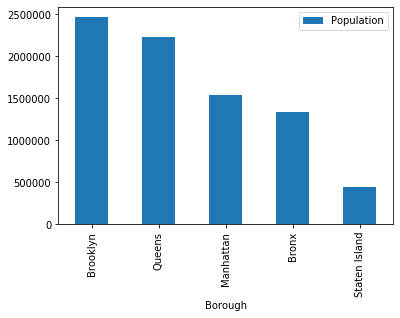

In [16]:
popu_df.plot(kind='bar',x='Borough',y='Population')
plt.show()

### Extract the race composition in NYC

In [17]:
race_df=demo_df[['White(%)','AfricanAmerican(%)','Asian(%)','Mixedrace(%)','Other(%)']].astype('float')

In [18]:
race_df.insert(0,'Borough',demo_df['Borough'])

In [19]:
race_df

,Borough,White(%),AfricanAmerican(%),Asian(%),Mixedrace(%),Other(%)
0,Brooklyn,41.2,36.4,7.5,4.3,10.6
1,Queens,44.1,20.0,17.6,6.1,12.3
2,Manhattan,54.4,17.4,9.4,4.1,14.7
3,Bronx,29.9,35.6,3.0,5.8,25.7
4,Staten Island,77.6,9.7,5.7,2.7,4.3
5,NYC Total,44.7,26.6,9.8,4.9,14.0


### Visualize the race compositions in NYC

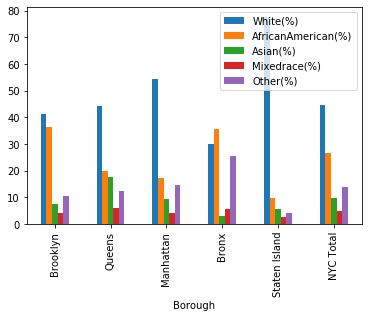

In [20]:
race_df.plot(kind='bar',x='Borough',y=['White(%)','AfricanAmerican(%)','Asian(%)','Mixedrace(%)','Other(%)'])
plt.show()

#### From the data shown above, the borough of Queens has the highest ratio of Asian people, which is potentially a ideal borough for opening a Chinese restaurant; therfore, we will explore more data from Queens.

### Visualize the race compositions in Queens of NYC with a pie chart

In [21]:
race_df_T=race_df.set_index('Borough').transpose()

In [22]:
race_df_T

Borough,Brooklyn,Queens,Manhattan,Bronx,Staten Island,NYC Total
White(%),41.2,44.1,54.4,29.9,77.6,44.7
AfricanAmerican(%),36.4,20.0,17.4,35.6,9.7,26.6
Asian(%),7.5,17.6,9.4,3.0,5.7,9.8
Mixedrace(%),4.3,6.1,4.1,5.8,2.7,4.9
Other(%),10.6,12.3,14.7,25.7,4.3,14.0


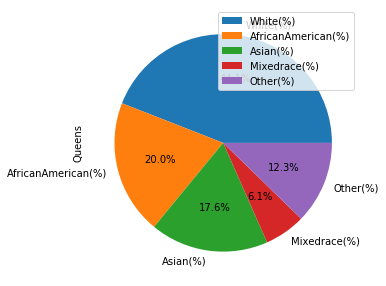

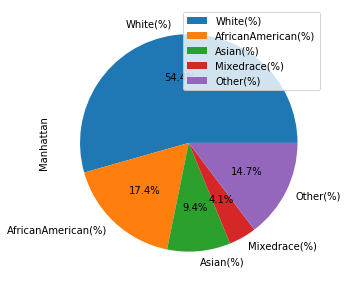

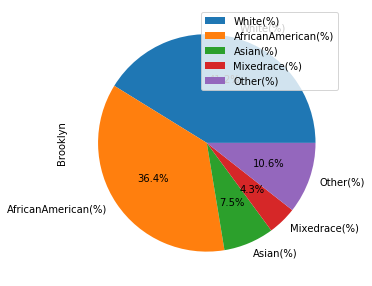

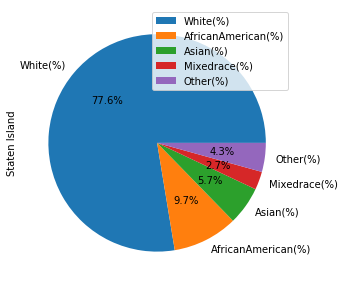

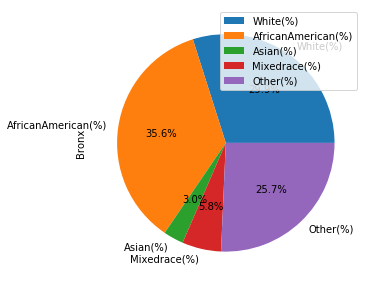

In [23]:
race_df_T.plot(kind='pie', y='Queens',figsize=(5, 5),autopct='%1.1f%%')
race_df_T.plot(kind='pie', y='Manhattan',figsize=(5, 5),autopct='%1.1f%%')
race_df_T.plot(kind='pie', y='Brooklyn',figsize=(5, 5),autopct='%1.1f%%')
race_df_T.plot(kind='pie', y='Staten Island',figsize=(5, 5),autopct='%1.1f%%')
race_df_T.plot(kind='pie', y='Bronx',figsize=(5, 5),autopct='%1.1f%%')

#### Potential customer source is only one factor to consider. Another important one is the housing rent. In order to consider the housing rent in NYC, we should also explore the rent prices in NYC

### Exploring the housing rent in NYC

In [24]:
# housing price dataset is Kaggle at https://www.kaggle.com/new-york-city/nyc-property-sales
df = pd.read_csv('./nyc-rolling-sales.csv')
df_raw = df
df.head()

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,,10009,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,,10009,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,,10009,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,,10009,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,,10009,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 22 columns):
Unnamed: 0                        84548 non-null int64
BOROUGH                           84548 non-null int64
NEIGHBORHOOD                      84548 non-null object
BUILDING CLASS CATEGORY           84548 non-null object
TAX CLASS AT PRESENT              84548 non-null object
BLOCK                             84548 non-null int64
LOT                               84548 non-null int64
EASE-MENT                         84548 non-null object
BUILDING CLASS AT PRESENT         84548 non-null object
ADDRESS                           84548 non-null object
APARTMENT NUMBER                  84548 non-null object
ZIP CODE                          84548 non-null int64
RESIDENTIAL UNITS                 84548 non-null int64
COMMERCIAL UNITS                  84548 non-null int64
TOTAL UNITS                       84548 non-null int64
LAND SQUARE FEET                  84548 non-null object
GRO

#### Data cleaning

In [26]:
# Remove  irrelavant columns: 
df.drop(["Unnamed: 0"], axis=1, inplace=True)
# date time variable
df['SALE DATE']= pd.to_datetime(df['SALE DATE'], errors='coerce')
df['sale_year'] = pd.DatetimeIndex(df['SALE DATE']).year.astype("category")
df['sale_month'] = pd.DatetimeIndex(df['SALE DATE']).month.astype("category")
pd.crosstab(df['sale_month'],df['sale_year'])
# numerical variables
numeric = ["RESIDENTIAL UNITS","COMMERCIAL UNITS","TOTAL UNITS", "LAND SQUARE FEET" , "GROSS SQUARE FEET","SALE PRICE" ]
for col in numeric: 
    df[col] = pd.to_numeric(df[col], errors='coerce') 
# categorical variables:
categorical = ["BOROUGH","NEIGHBORHOOD",'BUILDING CLASS CATEGORY', 'TAX CLASS AT PRESENT', 'BUILDING CLASS AT PRESENT','ZIP CODE', 'YEAR BUILT', 'BUILDING CLASS AT TIME OF SALE', 'TAX CLASS AT TIME OF SALE']

for col in categorical: 
    df[col] = df[col].astype("category")
# drop NA
df=df.dropna() 

In [27]:
# check NA
df.isna().sum()

BOROUGH                           0
NEIGHBORHOOD                      0
BUILDING CLASS CATEGORY           0
TAX CLASS AT PRESENT              0
BLOCK                             0
LOT                               0
EASE-MENT                         0
BUILDING CLASS AT PRESENT         0
ADDRESS                           0
APARTMENT NUMBER                  0
ZIP CODE                          0
RESIDENTIAL UNITS                 0
COMMERCIAL UNITS                  0
TOTAL UNITS                       0
LAND SQUARE FEET                  0
GROSS SQUARE FEET                 0
YEAR BUILT                        0
TAX CLASS AT TIME OF SALE         0
BUILDING CLASS AT TIME OF SALE    0
SALE PRICE                        0
SALE DATE                         0
sale_year                         0
sale_month                        0
dtype: int64

In [28]:
# check duplicated value:
sum(df.duplicated())

348

In [29]:
df.drop_duplicates(inplace=True)

/Users/Candy93/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [30]:
# drop strange entries with sale prices that are either less than 10,000 or greater than $10,000,000.
df2= df[(df['SALE PRICE']>10000) & (df['SALE PRICE']<10000000)].copy()
df2['SALE PRICE'].describe()

count    3.619700e+04
mean     8.796799e+05
std      1.032989e+06
min      1.000100e+04
25%      4.000000e+05
50%      6.100000e+05
75%      9.468710e+05
max      9.999999e+06
Name: SALE PRICE, dtype: float64

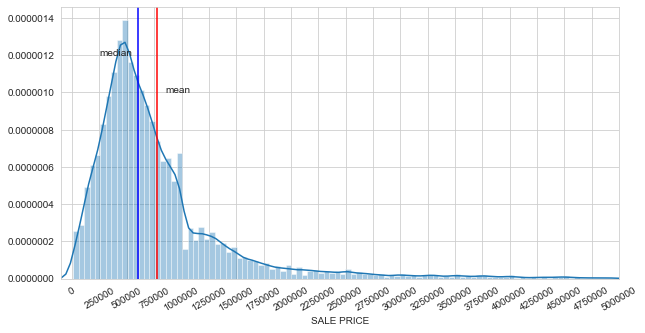

In [31]:
import matplotlib.ticker as ticker

sns.set_style("whitegrid")
plt.figure(figsize=(10,5))
plotd = sns.distplot(df2[(df2['SALE PRICE']>100) & (df2['SALE PRICE'] < 5000000)]['SALE PRICE'], kde=True, bins=100)

tick_spacing=250000 # set spacing for each tick
plotd.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
plotd.set_xlim([-100000, 5000000]) # do not show negative values 
plt.xticks(rotation=30) # rotate x ticks by 30 degrees
plt.axvline(df2[(df2['SALE PRICE']>100) & (df2['SALE PRICE'] < 5000000)]['SALE PRICE'].mean(), c='red')
plt.axvline(df2[(df2['SALE PRICE']>100) & (df2['SALE PRICE'] < 5000000)]['SALE PRICE'].median(), c='blue')
plt.text(250000,0.0000012, "median")
plt.text(850000,0.0000010, "mean")
plt.show()

### Data visualization

In [32]:
df2['BOROUGH']= df2['BOROUGH'].map({1:'Manhattan', 2:'Bronx', 3: 'Brooklyn', 4:'Queens',5:'Staten Island'})
df2.head()
df3 =df2[['BOROUGH', 'SALE PRICE']].groupby(by='BOROUGH').mean().sort_values(by='SALE PRICE', ascending=True).reset_index()
df3.rename(columns={'BOROUGH':'Borough','SALE PRICE':'Sale Price'},inplace=True)
df3

,Borough,Sale Price
0,Staten Island,5.364754e+05
1,Bronx,5.933875e+05
2,Queens,7.500697e+05
3,Brooklyn,1.036350e+06
4,Manhattan,4.356933e+06


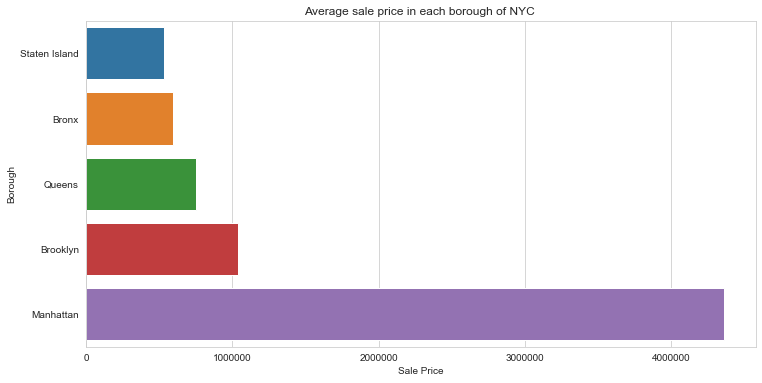

In [33]:
plt.figure(figsize=(12,6))
sns.barplot(y = 'Borough', x = 'Sale Price', data = df3)
plt.title('Average sale price in each borough of NYC ')
plt.show()

#### The above data is too general. We should explore the sale prices for the commercial units

In [34]:
dataset = df2[(df2['COMMERCIAL UNITS']<20) & (df2['TOTAL UNITS']<50) & (df2['SALE PRICE']<5000000) & (df2['SALE PRICE']>100000) & (df2['GROSS SQUARE FEET']>0)]

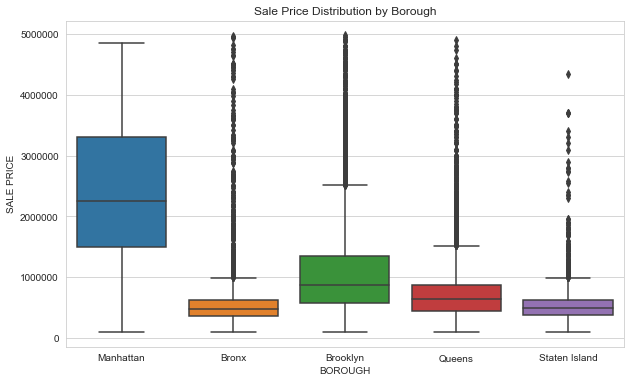

In [35]:
# Sales prices by borough
plt.figure(figsize=(10,6))
sns.boxplot(x='BOROUGH', y='SALE PRICE', data=dataset)
plt.title('Sale Price Distribution by Borough')
plt.show()

Text(0.5, 1.0, 'Commercial Units vs Sale Price')

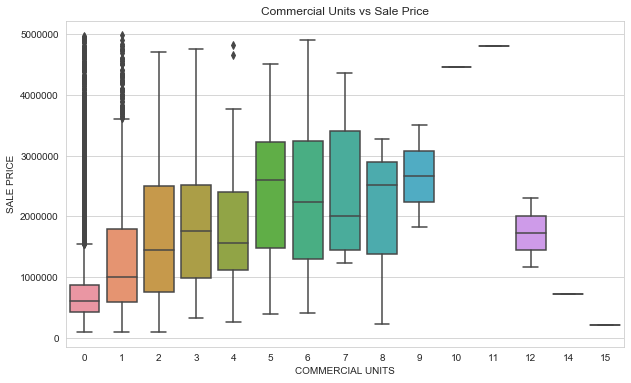

In [36]:
plt.figure(figsize=(10,6))
sns.boxplot(x='COMMERCIAL UNITS', y="SALE PRICE", data=dataset)
plt.title('Commercial Units vs Sale Price')

#### Based on the data analysis above, Queens is an ideal borough for opening a Chinese restaurant, owing to the high Asian race ratio and relatively low housing price in NYC.

In the next, we'll focus on Queens and explore its neighbourhoos by using Foursquare API.

In [37]:
Queens_data = neighborhoods[neighborhoods['Borough'] == 'Queens'].reset_index(drop=True)
Queens_data.head()

,Borough,Neighborhood,Latitude,Longitude
0,Queens,Astoria,40.768509,-73.915654
1,Queens,Woodside,40.746349,-73.901842
2,Queens,Jackson Heights,40.751981,-73.882821
3,Queens,Elmhurst,40.744049,-73.881656
4,Queens,Howard Beach,40.654225,-73.838138


Let's get the geographical coordinates of Queens.

In [38]:
address = 'Queens, NY'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Queens are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Queens are 40.7498243, -73.7976337.


### Visualization of neighborhoods in Queens

In [39]:
# create map of Queens using latitude and longitude values
map_Queens = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, label in zip(Queens_data['Latitude'], Queens_data['Longitude'], Queens_data['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_Queens)  
    
map_Queens

Next, we are going to start utilizing the Foursquare API to explore the neighborhoods and segment them.

#### Define Foursquare Credentials and Version

In [40]:
CLIENT_ID = 'DT425ITZ5SP2IERQZKH2XVXXYJMZRWB3LWAETOVA4CY5TTWI' # your Foursquare ID
CLIENT_SECRET = '0Q4YVQUB2YJ11WXSM4XKC0SSU3ZGJJDWGB0JGK00KKT51WXV' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 100 # A default Foursquare API limit value

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: DT425ITZ5SP2IERQZKH2XVXXYJMZRWB3LWAETOVA4CY5TTWI
CLIENT_SECRET:0Q4YVQUB2YJ11WXSM4XKC0SSU3ZGJJDWGB0JGK00KKT51WXV


In [41]:
# function that extracts the category of the venue
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        try:
            results = requests.get(url).json()["response"]['groups'][0]['items']
        except:
            pass
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

#### Now write the code to run the above function on each neighborhood and create a new dataframe called _Queens_venues_.

In [42]:
Queens_venues = getNearbyVenues(names=Queens_data['Neighborhood'],
                                   latitudes=Queens_data['Latitude'],
                                   longitudes=Queens_data['Longitude']
                                  )

Astoria
Woodside
Jackson Heights
Elmhurst
Howard Beach
Corona
Forest Hills
Kew Gardens
Richmond Hill
Flushing
Long Island City
Sunnyside
East Elmhurst
Maspeth
Ridgewood
Glendale
Rego Park
Woodhaven
Ozone Park
South Ozone Park
College Point
Whitestone
Bayside
Auburndale
Little Neck
Douglaston
Glen Oaks
Bellerose
Kew Gardens Hills
Fresh Meadows
Briarwood
Jamaica Center
Oakland Gardens
Queens Village
Hollis
South Jamaica
St. Albans
Rochdale
Springfield Gardens
Cambria Heights
Rosedale
Far Rockaway
Broad Channel
Breezy Point
Steinway
Beechhurst
Bay Terrace
Edgemere
Arverne
Rockaway Beach
Neponsit
Murray Hill
Floral Park
Holliswood
Jamaica Estates
Queensboro Hill
Hillcrest
Ravenswood
Lindenwood
Laurelton
Lefrak City
Belle Harbor
Rockaway Park
Somerville
Brookville
Bellaire
North Corona
Forest Hills Gardens
Jamaica Hills
Utopia
Pomonok
Astoria Heights
Hunters Point
Sunnyside Gardens
Blissville
Roxbury
Middle Village
Malba
Hammels
Bayswater
Queensbridge


In [43]:
# check the size of the resulting dataframe
print(Queens_venues.shape)
Queens_venues.head()

(2110, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Astoria,40.768509,-73.915654,Favela Grill,40.767348,-73.917897,Brazilian Restaurant
1,Astoria,40.768509,-73.915654,Titan Foods Inc.,40.769198,-73.919253,Gourmet Shop
2,Astoria,40.768509,-73.915654,CrossFit Queens,40.769404,-73.918977,Gym
3,Astoria,40.768509,-73.915654,Sitan Muay Thai,40.766108,-73.913224,Martial Arts School
4,Astoria,40.768509,-73.915654,Zyara Restaurant,40.766591,-73.912713,Restaurant


In [44]:
Queens_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Arverne,21,21,21,21,21,21
Astoria,100,100,100,100,100,100
Astoria Heights,12,12,12,12,12,12
Auburndale,19,19,19,19,19,19
Bay Terrace,37,37,37,37,37,37
Bayside,71,71,71,71,71,71
Bayswater,1,1,1,1,1,1
Beechhurst,17,17,17,17,17,17
Bellaire,13,13,13,13,13,13


Let's find out how many unique categories can be curated from all the returned venues

In [45]:
print('There are {} uniques categories.'.format(len(Queens_venues['Venue Category'].unique())))

There are 272 uniques categories.


### Analyze Each Neighborhood

In [46]:
# one hot encoding
Queens_onehot = pd.get_dummies(Queens_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
Queens_onehot['Neighborhood'] = Queens_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [Queens_onehot.columns[-1]] + list(Queens_onehot.columns[:-1])
Queens_onehot = Queens_onehot[fixed_columns]

Queens_onehot.head()

,Yoga Studio,ATM,Afghan Restaurant,American Restaurant,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Arts & Entertainment,Asian Restaurant,Athletics & Sports,Automotive Shop,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Basketball Court,Bath House,Beach,Beach Bar,Beer Garden,Big Box Store,Bike Trail,Bistro,Board Shop,Bookstore,Boutique,Bowling Alley,Boxing Gym,Brazilian Restaurant,Breakfast Spot,Brewery,Bubble Tea Shop,Buffet,Burger Joint,Burrito Place,Bus Line,Bus Station,Bus Stop,Business Service,Cafeteria,Café,Cajun / Creole Restaurant,Candy Store,Cantonese Restaurant,Caribbean Restaurant,Check Cashing Service,Cheese Shop,Chinese Restaurant,Church,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Academic Building,College Basketball Court,Colombian Restaurant,Comfort Food Restaurant,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Costume Shop,Creperie,Cuban Restaurant,Cycle Studio,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dive Bar,Dog Run,Donut Shop,Dosa Place,Dry Cleaner,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Empanada Restaurant,Event Space,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Fish & Chips Shop,Fish Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Stand,Food Truck,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gas Station,Gastropub,Gay Bar,General Entertainment,German Restaurant,Gift Shop,Gluten-free Restaurant,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gymnastics Gym,Halal Restaurant,Hardware Store,Health & Beauty Service,Health Food Store,Himalayan Restaurant,History Museum,Hobby Shop,Home Service,Hookah Bar,Hostel,Hotel,Hotel Bar,Hotel Pool,Hotpot Restaurant,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indonesian Restaurant,Indoor Play Area,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jewelry Store,Juice Bar,Karaoke Bar,Kids Store,Korean BBQ Restaurant,Korean Restaurant,Kosher Restaurant,Lake,Latin American Restaurant,Laundromat,Laundry Service,Lingerie Store,Liquor Store,Lounge,Malay Restaurant,Market,Martial Arts School,Mattress Store,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Monument / Landmark,Moroccan Restaurant,Motel,Motorcycle Shop,Movie Theater,Moving Target,Multiplex,Museum,Nail Salon,Nature Preserve,Neighborhood,New American Restaurant,Nightclub,Noodle House,North Indian Restaurant,Office,Optical Shop,Organic Grocery,Other Great Outdoors,Other Nightlife,Outdoors & Recreation,Paper / Office Supplies Store,Park,Performing Arts Venue,Peruvian Restaurant,Pet Service,Pet Store,Pharmacy,Pier,Pizza Place,Platform,Playground,Plaza,Poke Place,Polish Restaurant,Pool,Pool Hall,Pub,Ramen Restaurant,Recording Studio,Rental Car Location,Rental Service,Residential Building (Apartment / Condo),Resort,Rest Area,Restaurant,Romanian Restaurant,Roof Deck,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,School,Sculpture Garden,Seafood Restaurant,Shanghai Restaurant,Shipping Store,Shoe Store,Shop & Service,Shopping Mall,Skate Park,Skating Rink,Smoke Shop,Snack Place,South American Restaurant,Southern / Soul Food Restaurant,Souvlaki Shop,Spa,Spanish Restaurant,Sporting Goods Shop,Sports Bar,Sports Club,State / Provincial Park,Steakhouse,Storage Facility,Summer Camp,Supermarket,Supplement Shop,Surf Spot,Sushi Restaurant,Szechuan Restaurant,Taco Place,Tailor Shop,Taiwanese Restaurant,Tapas Restaurant,Tea Room,Tennis Court,Thai Restaurant,Theater,Thrift / Vintage Store,Tibetan Restaurant,Tiki Bar,Toy / Game Store,Track,Trail,Train Station,Turkish Restaurant,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Warehouse Store,Weight Loss Center,Wine Bar,Wine Shop,Wings Joint,Women's Store
0,0,

In [47]:
Queens_onehot.shape

(2110, 272)

#### Next, let's group rows by neighborhood and by taking the mean of the frequency of occurrence of each category

In [48]:
Queens_grouped = Queens_onehot.groupby('Neighborhood').mean().reset_index()
Queens_grouped

,Neighborhood,Yoga Studio,ATM,Afghan Restaurant,American Restaurant,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Arts & Entertainment,Asian Restaurant,Athletics & Sports,Automotive Shop,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Basketball Court,Bath House,Beach,Beach Bar,Beer Garden,Big Box Store,Bike Trail,Bistro,Board Shop,Bookstore,Boutique,Bowling Alley,Boxing Gym,Brazilian Restaurant,Breakfast Spot,Brewery,Bubble Tea Shop,Buffet,Burger Joint,Burrito Place,Bus Line,Bus Station,Bus Stop,Business Service,Cafeteria,Café,Cajun / Creole Restaurant,Candy Store,Cantonese Restaurant,Caribbean Restaurant,Check Cashing Service,Cheese Shop,Chinese Restaurant,Church,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Academic Building,College Basketball Court,Colombian Restaurant,Comfort Food Restaurant,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Costume Shop,Creperie,Cuban Restaurant,Cycle Studio,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dive Bar,Dog Run,Donut Shop,Dosa Place,Dry Cleaner,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Empanada Restaurant,Event Space,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Fish & Chips Shop,Fish Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Stand,Food Truck,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gas Station,Gastropub,Gay Bar,General Entertainment,German Restaurant,Gift Shop,Gluten-free Restaurant,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gymnastics Gym,Halal Restaurant,Hardware Store,Health & Beauty Service,Health Food Store,Himalayan Restaurant,History Museum,Hobby Shop,Home Service,Hookah Bar,Hostel,Hotel,Hotel Bar,Hotel Pool,Hotpot Restaurant,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indonesian Restaurant,Indoor Play Area,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jewelry Store,Juice Bar,Karaoke Bar,Kids Store,Korean BBQ Restaurant,Korean Restaurant,Kosher Restaurant,Lake,Latin American Restaurant,Laundromat,Laundry Service,Lingerie Store,Liquor Store,Lounge,Malay Restaurant,Market,Martial Arts School,Mattress Store,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Monument / Landmark,Moroccan Restaurant,Motel,Motorcycle Shop,Movie Theater,Moving Target,Multiplex,Museum,Nail Salon,Nature Preserve,New American Restaurant,Nightclub,Noodle House,North Indian Restaurant,Office,Optical Shop,Organic Grocery,Other Great Outdoors,Other Nightlife,Outdoors & Recreation,Paper / Office Supplies Store,Park,Performing Arts Venue,Peruvian Restaurant,Pet Service,Pet Store,Pharmacy,Pier,Pizza Place,Platform,Playground,Plaza,Poke Place,Polish Restaurant,Pool,Pool Hall,Pub,Ramen Restaurant,Recording Studio,Rental Car Location,Rental Service,Residential Building (Apartment / Condo),Resort,Rest Area,Restaurant,Romanian Restaurant,Roof Deck,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,School,Sculpture Garden,Seafood Restaurant,Shanghai Restaurant,Shipping Store,Shoe Store,Shop & Service,Shopping Mall,Skate Park,Skating Rink,Smoke Shop,Snack Place,South American Restaurant,Southern / Soul Food Restaurant,Souvlaki Shop,Spa,Spanish Restaurant,Sporting Goods Shop,Sports Bar,Sports Club,State / Provincial Park,Steakhouse,Storage Facility,Summer Camp,Supermarket,Supplement Shop,Surf Spot,Sushi Restaurant,Szechuan Restaurant,Taco Place,Tailor Shop,Taiwanese Restaurant,Tapas Restaurant,Tea Room,Tennis Court,Thai Restaurant,Theater,Thrift / Vintage Store,Tibetan Restaurant,Tiki Bar,Toy / Game Store,Track,Trail,Train Station,Turkish Restaurant,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Warehouse Store,Weight Loss Center,Wine Bar,Wine Shop,Wings Joint,Women's Store
0,Ar

#### Let's confirm the new size

In [49]:
Queens_grouped.shape

(81, 272)

#### Let's print each neighborhood along with the top 10 most common venues

In [50]:
num_top_venues = 20

for hood in Queens_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = Queens_grouped[Queens_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Arverne----
                      venue  freq
0                 Surf Spot  0.19
1            Sandwich Place  0.10
2             Metro Station  0.10
3                     Beach  0.05
4                      Café  0.05
5             Burrito Place  0.05
6         French Restaurant  0.05
7                Board Shop  0.05
8               Coffee Shop  0.05
9                  Tiki Bar  0.05
10                BBQ Joint  0.05
11                 Bus Stop  0.05
12              Pizza Place  0.05
13               Donut Shop  0.05
14                Wine Shop  0.05
15               Playground  0.05
16          Other Nightlife  0.00
17  New American Restaurant  0.00
18                Nightclub  0.00
19             Noodle House  0.00


----Astoria----
                        venue  freq
0            Greek Restaurant  0.06
1   Middle Eastern Restaurant  0.06
2                         Bar  0.06
3                  Hookah Bar  0.04
4          Seafood Restaurant  0.04
5                      Bakery  0.04


                            venue  freq
0                           Beach  0.50
1                        Bus Stop  0.17
2             Monument / Landmark  0.17
3                           Trail  0.17
4                     Yoga Studio  0.00
5                          Office  0.00
6                 Other Nightlife  0.00
7            Other Great Outdoors  0.00
8                 Organic Grocery  0.00
9                    Optical Shop  0.00
10        North Indian Restaurant  0.00
11  Paper / Office Supplies Store  0.00
12                   Noodle House  0.00
13                      Nightclub  0.00
14        New American Restaurant  0.00
15                Nature Preserve  0.00
16                     Nail Salon  0.00
17          Outdoors & Recreation  0.00
18                           Park  0.00
19                      Multiplex  0.00


----Briarwood----
                            venue  freq
0                   Deli / Bodega  0.22
1                     Coffee Shop  0.11
2                   

                            venue  freq
0               Indian Restaurant  0.29
1                      Dosa Place  0.14
2                   Grocery Store  0.14
3                     Pizza Place  0.14
4              Salon / Barbershop  0.14
5                Basketball Court  0.14
6                       Nightclub  0.00
7                    Noodle House  0.00
8         North Indian Restaurant  0.00
9                          Office  0.00
10  Paper / Office Supplies Store  0.00
11        New American Restaurant  0.00
12                Nature Preserve  0.00
13                   Optical Shop  0.00
14                Organic Grocery  0.00
15                     Nail Salon  0.00
16           Other Great Outdoors  0.00
17                Other Nightlife  0.00
18          Outdoors & Recreation  0.00
19                    Yoga Studio  0.00


----Flushing----
                         venue  freq
0            Hotpot Restaurant  0.10
1           Chinese Restaurant  0.06
2                       Bakery

                   venue  freq
0               Pharmacy  0.08
1     Italian Restaurant  0.08
2   Fast Food Restaurant  0.05
3          Deli / Bodega  0.05
4         Sandwich Place  0.05
5         Breakfast Spot  0.03
6       Tapas Restaurant  0.03
7            Flower Shop  0.03
8      Convenience Store  0.03
9       Sushi Restaurant  0.03
10                 Motel  0.03
11      Indoor Play Area  0.03
12            Hookah Bar  0.03
13  Gym / Fitness Center  0.03
14                   Gym  0.03
15           Sports Club  0.03
16    Seafood Restaurant  0.03
17        Shipping Store  0.03
18        Clothing Store  0.03
19    Chinese Restaurant  0.03


----Hunters Point----
                                       venue  freq
0                                       Café  0.07
1                         Italian Restaurant  0.06
2                        Japanese Restaurant  0.04
3                        American Restaurant  0.04
4                                Coffee Shop  0.04
5                  

                            venue  freq
0                    Tennis Court   0.5
1                       Rest Area   0.5
2                     Yoga Studio   0.0
3         North Indian Restaurant   0.0
4                 Other Nightlife   0.0
5            Other Great Outdoors   0.0
6                 Organic Grocery   0.0
7                    Optical Shop   0.0
8                          Office   0.0
9                    Noodle House   0.0
10  Paper / Office Supplies Store   0.0
11                      Nightclub   0.0
12        New American Restaurant   0.0
13                Nature Preserve   0.0
14                     Nail Salon   0.0
15                         Museum   0.0
16          Outdoors & Recreation   0.0
17                           Park   0.0
18                  Moving Target   0.0
19          Performing Arts Venue   0.0


----Maspeth----
                  venue  freq
0                  Bank  0.09
1                 Diner  0.09
2           Pizza Place  0.09
3         Grocery Stor

                     venue  freq
0                   Bakery  0.09
1       Chinese Restaurant  0.07
2              Pizza Place  0.07
3   Furniture / Home Store  0.04
4               Donut Shop  0.04
5               Restaurant  0.04
6                 Pharmacy  0.04
7           Sandwich Place  0.04
8            Grocery Store  0.04
9         Sushi Restaurant  0.04
10        Indoor Play Area  0.02
11     Peruvian Restaurant  0.02
12       Health Food Store  0.02
13    Gym / Fitness Center  0.02
14             Flower Shop  0.02
15     Shanghai Restaurant  0.02
16             Coffee Shop  0.02
17                    Park  0.02
18              Nail Salon  0.02
19             Snack Place  0.02


----Richmond Hill----
                        venue  freq
0                        Bank  0.09
1                 Pizza Place  0.09
2   Latin American Restaurant  0.09
3        Caribbean Restaurant  0.09
4                      Lounge  0.09
5               Deli / Bodega  0.04
6              Discount Store  

                            venue  freq
0                     Bus Station  0.12
1                      Donut Shop  0.12
2                     Gas Station  0.06
3                    Liquor Store  0.06
4                            Park  0.06
5            Fast Food Restaurant  0.06
6              Chinese Restaurant  0.06
7                             Gym  0.06
8           Check Cashing Service  0.06
9                  Sandwich Place  0.06
10                     Shoe Store  0.06
11                     Laundromat  0.06
12                   Intersection  0.06
13            Fried Chicken Joint  0.06
14  Paper / Office Supplies Store  0.00
15           Other Great Outdoors  0.00
16                Other Nightlife  0.00
17                   Optical Shop  0.00
18                         Office  0.00
19        North Indian Restaurant  0.00


----St. Albans----
                            venue  freq
0            Caribbean Restaurant  0.25
1                   Deli / Bodega  0.06
2               Hea

#### Let's put that into a _pandas_ dataframe

In [51]:
# define a function to sort the venues in descending order
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

Now let's create the new dataframe and display the top 20 venues for each neighborhood.

In [52]:
num_top_venues = 20

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = Queens_grouped['Neighborhood']

for ind in np.arange(Queens_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(Queens_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,11th Most Common Venue,12th Most Common Venue,13th Most Common Venue,14th Most Common Venue,15th Most Common Venue,16th Most Common Venue,17th Most Common Venue,18th Most Common Venue,19th Most Common Venue,20th Most Common Venue
0,Arverne,Surf Spot,Sandwich Place,Metro Station,Café,Donut Shop,Burrito Place,Coffee Shop,BBQ Joint,Tiki Bar,Board Shop,Beach,Playground,Bus Stop,French Restaurant,Pizza Place,Wine Shop,Flower Shop,Farmers Market,Fish Market,Food
1,Astoria,Middle Eastern Restaurant,Bar,Greek Restaurant,Café,Hookah Bar,Seafood Restaurant,Bakery,Indian Restaurant,Mediterranean Restaurant,Deli / Bodega,Bubble Tea Shop,Bagel Shop,Pizza Place,Wine Shop,Gym / Fitness Center,Gym,Gourmet Shop,Pub,Dessert Shop,Japanese Restaurant
2,Astoria Heights,Burger Joint,Pizza Place,Bakery,Museum,Supermarket,Food,Bus Station,Bowling Alley,Italian Restaurant,Hostel,Playground,Plaza,Food & Drink Shop,Falafel Restaurant,Flower Shop,Food Court,Fish Market,Fish & Chips Shop,Filipino Restaurant,Fast Food Restaurant
3,Auburndale,Italian Restaurant,Mobile Phone Shop,Train Station,Supermarket,Fast Food Restaurant,Bar,Gymnastics Gym,Mattress Store,Toy / Game Store,Sushi Restaurant,Discount Store,Athletics & Sports,Pet Store,Pharmacy,Hookah Bar,American Restaurant,Miscellaneous Shop,Noodle House,Flower Shop,Fish Market
4,Bay Terrace,Clothing Store,American Restaurant,Women's Store,Kids Store,Shoe Store,Cosmetics Shop,Mobile Phone Shop,Donut Shop,Pharmacy,Shopping Mall,Coffee Shop,Pizza Place,Movie Theater,Deli / Bodega,Supermarket,Men's Store,Furniture / Home Store,Lingerie Store,Gluten-free Restaurant,Gym


### Cluster Neighborhoods

Run k-means to cluster the neighborhood into 5 clusters.

In [53]:
# set number of clusters
kclusters = 5

Queens_grouped_clustering = Queens_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(Queens_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([3, 3, 3, 3, 3, 3, 0, 3, 3, 3], dtype=int32)

Let's create a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood.

In [54]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

Queens_merged = Queens_data

# merge Queens_grouped with Queens_data to add latitude/longitude for each neighborhood
Queens_merged = Queens_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

Queens_merged.head() # check the last columns!

,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,11th Most Common Venue,12th Most Common Venue,13th Most Common Venue,14th Most Common Venue,15th Most Common Venue,16th Most Common Venue,17th Most Common Venue,18th Most Common Venue,19th Most Common Venue,20th Most Common Venue
0,Queens,Astoria,40.768509,-73.915654,3,Middle Eastern Restaurant,Bar,Greek Restaurant,Café,Hookah Bar,Seafood Restaurant,Bakery,Indian Restaurant,Mediterranean Restaurant,Deli / Bodega,Bubble Tea Shop,Bagel Shop,Pizza Place,Wine Shop,Gym / Fitness Center,Gym,Gourmet Shop,Pub,Dessert Shop,Japanese Restaurant
1,Queens,Woodside,40.746349,-73.901842,3,Grocery Store,Bakery,Thai Restaurant,Latin American Restaurant,Filipino Restaurant,American Restaurant,Donut Shop,Bar,Pub,Café,Sandwich Place,Ice Cream Shop,Gym / Fitness Center,Pharmacy,Chinese Restaurant,Pizza Place,Gourmet Shop,Bubble Tea Shop,Spa,Fruit & Vegetable Store
2,Queens,Jackson Heights,40.751981,-73.882821,3,Latin American Restaurant,Peruvian Restaurant,South American Restaurant,Bakery,Mobile Phone Shop,Supermarket,Thai Restaurant,Diner,Empanada Restaurant,Spanish Restaurant,Pizza Place,Grocery Store,Mexican Restaurant,Cocktail Bar,Spa,Cajun / Creole Restaurant,Café,Laundromat,Colombian Restaurant,School
3,Queens,Elmhurst,40.744049,-73.881656,3,Thai Restaurant,Mexican Restaurant,Vietnamese Restaurant,South American Restaurant,Bubble Tea Shop,Chinese Restaurant,Salon / Barbershop,Fast Food Restaurant,Seafood Restaurant,Bank,Snack Place,Colombian Restaurant,Donut Shop,Malay Restaurant,Big Box Store,Sushi Restaurant,Bar,Food Court,Pizza Place,Gym / Fitness Center
4,Queens,Howard Beach,40.654225,-73.838138,3,Italian Restaurant,Pharmacy,Sandwich Place,Fast Food Restaurant,Deli / Bodega,Indoor Play Area,Diner,Sports Club,Breakfast Spot,Shipping Store,Seafood Restaurant,Chinese Restaurant,Clothing Store,Pet Store,Donut Shop,Sushi Restaurant,Motel,Flower Shop,Mexican Restaurant,Market


Finally, let's visualize the resulting clusters

In [55]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(Queens_merged['Latitude'], Queens_merged['Longitude'], Queens_merged['Neighborhood'], Queens_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

## Examine Clusters

### Cluster 0

In [56]:
Queens_merged.loc[Queens_merged['Cluster Labels'] == 0, Queens_merged.columns[[1] + list(range(5, Queens_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,11th Most Common Venue,12th Most Common Venue,13th Most Common Venue,14th Most Common Venue,15th Most Common Venue,16th Most Common Venue,17th Most Common Venue,18th Most Common Venue,19th Most Common Venue,20th Most Common Venue
79,Bayswater,Playground,Women's Store,Fish Market,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Fish & Chips Shop,Flower Shop,Empanada Restaurant,Food,Food & Drink Shop,Food Court,Food Stand,Food Truck,Event Space,Electronics Store,Indonesian Restaurant,Eastern European Restaurant


### Cluster 1

In [57]:
Queens_merged.loc[Queens_merged['Cluster Labels'] == 1, Queens_merged.columns[[1] + list(range(5, Queens_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,11th Most Common Venue,12th Most Common Venue,13th Most Common Venue,14th Most Common Venue,15th Most Common Venue,16th Most Common Venue,17th Most Common Venue,18th Most Common Venue,19th Most Common Venue,20th Most Common Venue
35,South Jamaica,Bus Station,Caribbean Restaurant,Shop & Service,Grocery Store,Bakery,Bus Line,Supermarket,Vegetarian / Vegan Restaurant,Women's Store,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Fish Market,Fish & Chips Shop,Falafel Restaurant,Flower Shop,Food,Food & Drink Shop,Food Court,Farm
36,St. Albans,Caribbean Restaurant,Deli / Bodega,Donut Shop,Dance Studio,Motorcycle Shop,Fried Chicken Joint,Café,Fast Food Restaurant,Shopping Mall,Health Food Store,Chinese Restaurant,Discount Store,Convenience Store,Dry Cleaner,Department Store,Dessert Shop,Dim Sum Restaurant,Food & Drink Shop,Food,Flower Shop
39,Cambria Heights,Caribbean Restaurant,Restaurant,Pharmacy,Chinese Restaurant,Bakery,Nightclub,Gym / Fitness Center,Flower Shop,Moving Target,Liquor Store,Fish & Chips Shop,Fish Market,Event Space,Filipino Restaurant,Fast Food Restaurant,Farmers Market,Food,Farm,Food & Drink Shop,Falafel Restaurant
59,Laurelton,Caribbean Restaurant,Cosmetics Shop,Park,Train Station,Filipino Restaurant,Event Space,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Women's Store,Empanada Restaurant,Fish Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Stand,Fish & Chips Shop,Eastern European Restaurant


### Cluster 2

In [58]:
Queens_merged.loc[Queens_merged['Cluster Labels'] == 2, Queens_merged.columns[[1] + list(range(5, Queens_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,11th Most Common Venue,12th Most Common Venue,13th Most Common Venue,14th Most Common Venue,15th Most Common Venue,16th Most Common Venue,17th Most Common Venue,18th Most Common Venue,19th Most Common Venue,20th Most Common Venue
77,Malba,Tennis Court,Rest Area,Women's Store,Filipino Restaurant,Event Space,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Fish & Chips Shop,Electronics Store,Fish Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Stand,Empanada Restaurant,Eastern European Restaurant,French Restaurant


### Cluster 3

In [59]:
Queens_merged.loc[Queens_merged['Cluster Labels'] == 3, Queens_merged.columns[[1] + list(range(5, Queens_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,11th Most Common Venue,12th Most Common Venue,13th Most Common Venue,14th Most Common Venue,15th Most Common Venue,16th Most Common Venue,17th Most Common Venue,18th Most Common Venue,19th Most Common Venue,20th Most Common Venue
0,Astoria,Middle Eastern Restaurant,Bar,Greek Restaurant,Café,Hookah Bar,Seafood Restaurant,Bakery,Indian Restaurant,Mediterranean Restaurant,Deli / Bodega,Bubble Tea Shop,Bagel Shop,Pizza Place,Wine Shop,Gym / Fitness Center,Gym,Gourmet Shop,Pub,Dessert Shop,Japanese Restaurant
1,Woodside,Grocery Store,Bakery,Thai Restaurant,Latin American Restaurant,Filipino Restaurant,American Restaurant,Donut Shop,Bar,Pub,Café,Sandwich Place,Ice Cream Shop,Gym / Fitness Center,Pharmacy,Chinese Restaurant,Pizza Place,Gourmet Shop,Bubble Tea Shop,Spa,Fruit & Vegetable Store
2,Jackson Heights,Latin American Restaurant,Peruvian Restaurant,South American Restaurant,Bakery,Mobile Phone Shop,Supermarket,Thai Restaurant,Diner,Empanada Restaurant,Spanish Restaurant,Pizza Place,Grocery Store,Mexican Restaurant,Cocktail Bar,Spa,Cajun / Creole Restaurant,Café,Laundromat,Colombian Restaurant,School
3,Elmhurst,Thai Restaurant,Mexican Restaurant,Vietnamese Restaurant,South American Restaurant,Bubble Tea Shop,Chinese Restaurant,Salon / Barbershop,Fast Food Restaurant,Seafood Restaurant,Bank,Snack Place,Colombian Restaurant,Donut Shop,Malay Restaurant,Big Box Store,Sushi Restaurant,Bar,Food Court,Pizza Place,Gym / Fitness Center
4,Howard Beach,Italian Restaurant,Pharmacy,Sandwich Place,Fast Food Restaurant,Deli / Bodega,Indoor Play Area,Diner,Sports Club,Breakfast Spot,Shipping Store,Seafood Restaurant,Chinese Restaurant,Clothing Store,Pet Store,Donut Shop,Sushi Restaurant,Motel,Flower Shop,Mexican Restaurant,Market
5,Corona,Mexican Restaurant,Supermarket,Ice Cream Shop,Bakery,Pizza Place,Convenience Store,Park,Donut Shop,Restaurant,Sandwich Place,Chinese Restaurant,Empanada Restaurant,Bus Station,South American Restaurant,Deli / Bodega,Italian Restaurant,Halal Restaurant,Dry Cleaner,Filipino Restaurant,Fast Food Restaurant
6,Forest Hills,Gym,Gym / Fitness Center,Yoga Studio,Pizza Place,Park,Thai Restaurant,Convenience Store,Pharmacy,Food Truck,Liquor Store,Boxing Gym,Martial Arts School,Farmers Market,Snack Place,Supplement Shop,Chinese Restaurant,Coffee Shop,Optical Shop,Donut Shop,Diner
7,Kew Gardens,Chinese Restaurant,Park,Pizza Place,Bar,Cosmetics Shop,Indian Restaurant,Bank,Donut Shop,Convenience Store,Café,Spa,South American Restaurant,Food,Mexican Restaurant,Fish Market,New American Restaurant,Sandwich Place,Movie Theater,Supermarket,Pub
8,Richmond Hill,Caribbean Restaurant,Lounge,Latin American Restaurant,Pizza Place,Bank,Deli / Bodega,Supermarket,Sandwich Place,Metro Station,Gym / Fitness Center,Donut Shop,Park,Pet Service,Discount Store,Diner,Costume Shop,Spanish Restaurant,Indian Restaurant,Filipino Restaurant,Fish & Chips Shop
9,Flushing,Hotpot Restaurant,Chinese Restaurant,Bubble Tea Shop,Korean Restaurant,Bakery,Asian Restaurant,Karaoke Bar,Gym,Gym / Fitness Center,BBQ Joint,Construction & Landscaping,Dumpling Restaurant,Cantonese Restaurant,Dim Sum Restaurant,Deli / Bodega,Food Truck,Food,Shipping Store,Café,Organic Grocery


### Cluster 4

In [60]:
Queens_merged.loc[Queens_merged['Cluster Labels'] == 4, Queens_merged.columns[[1] + list(range(5, Queens_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,11th Most Common Venue,12th Most Common Venue,13th Most Common Venue,14th Most Common Venue,15th Most Common Venue,16th Most Common Venue,17th Most Common Venue,18th Most Common Venue,19th Most Common Venue,20th Most Common Venue
43,Breezy Point,Beach,Monument / Landmark,Trail,Bus Stop,Women's Store,Fish Market,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Fish & Chips Shop,Flower Shop,Falafel Restaurant,Food,Food & Drink Shop,Food Court,Food Stand,Food Truck,Farm,Event Space,Fried Chicken Joint
50,Neponsit,Beach,Women's Store,Fish & Chips Shop,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Fish Market,Fried Chicken Joint,Flower Shop,Food,Food & Drink Shop,Food Court,Food Stand,Food Truck,Event Space,Empanada Restaurant,Electronics Store,Eastern European Restaurant


In [61]:
Queens_merged.head()

,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,11th Most Common Venue,12th Most Common Venue,13th Most Common Venue,14th Most Common Venue,15th Most Common Venue,16th Most Common Venue,17th Most Common Venue,18th Most Common Venue,19th Most Common Venue,20th Most Common Venue
0,Queens,Astoria,40.768509,-73.915654,3,Middle Eastern Restaurant,Bar,Greek Restaurant,Café,Hookah Bar,Seafood Restaurant,Bakery,Indian Restaurant,Mediterranean Restaurant,Deli / Bodega,Bubble Tea Shop,Bagel Shop,Pizza Place,Wine Shop,Gym / Fitness Center,Gym,Gourmet Shop,Pub,Dessert Shop,Japanese Restaurant
1,Queens,Woodside,40.746349,-73.901842,3,Grocery Store,Bakery,Thai Restaurant,Latin American Restaurant,Filipino Restaurant,American Restaurant,Donut Shop,Bar,Pub,Café,Sandwich Place,Ice Cream Shop,Gym / Fitness Center,Pharmacy,Chinese Restaurant,Pizza Place,Gourmet Shop,Bubble Tea Shop,Spa,Fruit & Vegetable Store
2,Queens,Jackson Heights,40.751981,-73.882821,3,Latin American Restaurant,Peruvian Restaurant,South American Restaurant,Bakery,Mobile Phone Shop,Supermarket,Thai Restaurant,Diner,Empanada Restaurant,Spanish Restaurant,Pizza Place,Grocery Store,Mexican Restaurant,Cocktail Bar,Spa,Cajun / Creole Restaurant,Café,Laundromat,Colombian Restaurant,School
3,Queens,Elmhurst,40.744049,-73.881656,3,Thai Restaurant,Mexican Restaurant,Vietnamese Restaurant,South American Restaurant,Bubble Tea Shop,Chinese Restaurant,Salon / Barbershop,Fast Food Restaurant,Seafood Restaurant,Bank,Snack Place,Colombian Restaurant,Donut Shop,Malay Restaurant,Big Box Store,Sushi Restaurant,Bar,Food Court,Pizza Place,Gym / Fitness Center
4,Queens,Howard Beach,40.654225,-73.838138,3,Italian Restaurant,Pharmacy,Sandwich Place,Fast Food Restaurant,Deli / Bodega,Indoor Play Area,Diner,Sports Club,Breakfast Spot,Shipping Store,Seafood Restaurant,Chinese Restaurant,Clothing Store,Pet Store,Donut Shop,Sushi Restaurant,Motel,Flower Shop,Mexican Restaurant,Market


In [62]:
temp=Queens_merged.copy()

In [63]:
temp.drop(['Borough','Latitude','Longitude','Cluster Labels'],axis=1,inplace=True)

In [64]:
temp.head(3)

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,11th Most Common Venue,12th Most Common Venue,13th Most Common Venue,14th Most Common Venue,15th Most Common Venue,16th Most Common Venue,17th Most Common Venue,18th Most Common Venue,19th Most Common Venue,20th Most Common Venue
0,Astoria,Middle Eastern Restaurant,Bar,Greek Restaurant,Café,Hookah Bar,Seafood Restaurant,Bakery,Indian Restaurant,Mediterranean Restaurant,Deli / Bodega,Bubble Tea Shop,Bagel Shop,Pizza Place,Wine Shop,Gym / Fitness Center,Gym,Gourmet Shop,Pub,Dessert Shop,Japanese Restaurant
1,Woodside,Grocery Store,Bakery,Thai Restaurant,Latin American Restaurant,Filipino Restaurant,American Restaurant,Donut Shop,Bar,Pub,Café,Sandwich Place,Ice Cream Shop,Gym / Fitness Center,Pharmacy,Chinese Restaurant,Pizza Place,Gourmet Shop,Bubble Tea Shop,Spa,Fruit & Vegetable Store
2,Jackson Heights,Latin American Restaurant,Peruvian Restaurant,South American Restaurant,Bakery,Mobile Phone Shop,Supermarket,Thai Restaurant,Diner,Empanada Restaurant,Spanish Restaurant,Pizza Place,Grocery Store,Mexican Restaurant,Cocktail Bar,Spa,Cajun / Creole Restaurant,Café,Laundromat,Colombian Restaurant,School


In [65]:
cols=list(temp.drop('Neighborhood',axis=1).columns)

In [66]:
cols

['1st Most Common Venue',
 '2nd Most Common Venue',
 '3rd Most Common Venue',
 '4th Most Common Venue',
 '5th Most Common Venue',
 '6th Most Common Venue',
 '7th Most Common Venue',
 '8th Most Common Venue',
 '9th Most Common Venue',
 '10th Most Common Venue',
 '11th Most Common Venue',
 '12th Most Common Venue',
 '13th Most Common Venue',
 '14th Most Common Venue',
 '15th Most Common Venue',
 '16th Most Common Venue',
 '17th Most Common Venue',
 '18th Most Common Venue',
 '19th Most Common Venue',
 '20th Most Common Venue']

If a most common venue has restaurant, we assign a score 1;
however,if a most common venue has a Chinese restaurant, we assign a negative score -1. For other cases, we assign score 0.

In [67]:
score_lists=[]
for col in cols:
    score_list=[]
    for i in range(temp.shape[0]):
        if 'Restaurant' in temp[col][i] and 'Chinese Restaurant' not in temp[col][i]:
            score = 1
        elif 'Chinese Restaurant' in temp[col][i]:
            score = -1
        else:
            score = 0
        score_list.append(score)
    score_lists.append(score_list)

In [68]:
score_pd=pd.DataFrame(score_lists).T
score_pd.columns=cols
score_pd.insert(0,'Neighborhood',temp['Neighborhood'])
score_pd

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,11th Most Common Venue,12th Most Common Venue,13th Most Common Venue,14th Most Common Venue,15th Most Common Venue,16th Most Common Venue,17th Most Common Venue,18th Most Common Venue,19th Most Common Venue,20th Most Common Venue
0,Astoria,1,0,1,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,1
1,Woodside,0,0,1,1,1,1,0,0,0,0,0,0,0,0,-1,0,0,0,0,0
2,Jackson Heights,1,1,1,0,0,0,1,0,1,1,0,0,1,0,0,1,0,0,1,0
3,Elmhurst,1,1,1,1,0,-1,0,1,1,0,0,1,0,1,0,1,0,0,0,0
4,Howard Beach,1,0,0,1,0,0,0,0,0,0,1,-1,0,0,0,1,0,0,1,0
5,Corona,1,0,0,0,0,0,0,0,1,0,-1,1,0,1,0,1,1,0,1,1
6,Forest Hills,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,-1,0,0,0,0
7,Kew Gardens,-1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0,0,0,0
8,Richmond Hill,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0
9,Flushing,1,-1,0,1,0,1,0,0,0,0,0,1,1,1,0,0,0,0,0,0


### For each column, give a weigh ((100-k*i)/100, where i is the rank of Most Common Venue, k is a constant) for each column 

In [69]:
score_pd

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,11th Most Common Venue,12th Most Common Venue,13th Most Common Venue,14th Most Common Venue,15th Most Common Venue,16th Most Common Venue,17th Most Common Venue,18th Most Common Venue,19th Most Common Venue,20th Most Common Venue
0,Astoria,1,0,1,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,1
1,Woodside,0,0,1,1,1,1,0,0,0,0,0,0,0,0,-1,0,0,0,0,0
2,Jackson Heights,1,1,1,0,0,0,1,0,1,1,0,0,1,0,0,1,0,0,1,0
3,Elmhurst,1,1,1,1,0,-1,0,1,1,0,0,1,0,1,0,1,0,0,0,0
4,Howard Beach,1,0,0,1,0,0,0,0,0,0,1,-1,0,0,0,1,0,0,1,0
5,Corona,1,0,0,0,0,0,0,0,1,0,-1,1,0,1,0,1,1,0,1,1
6,Forest Hills,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,-1,0,0,0,0
7,Kew Gardens,-1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0,0,0,0
8,Richmond Hill,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0
9,Flushing,1,-1,0,1,0,1,0,0,0,0,0,1,1,1,0,0,0,0,0,0


In [70]:
k=0.5 # the larger k, the bigger weight dicreae as the rank of Most Common Venue decreases
for i in range(len(cols)):
    score_pd[cols[i]] = score_pd[cols[i]].apply(lambda x: x*((100-k*i)/100))

In [71]:
score_pd['total_score']=score_pd.sum(axis=1)

In [72]:
score_pd.sort_values(by=['total_score'],ascending=False)

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,11th Most Common Venue,12th Most Common Venue,13th Most Common Venue,14th Most Common Venue,15th Most Common Venue,16th Most Common Venue,17th Most Common Venue,18th Most Common Venue,19th Most Common Venue,20th Most Common Venue,total_score
2,Jackson Heights,1.0,0.995,0.99,0.000,0.00,0.000,0.97,0.000,0.96,0.955,0.00,0.000,0.94,0.000,0.00,0.925,0.00,0.000,0.91,0.000,8.645
3,Elmhurst,1.0,0.995,0.99,0.985,0.00,-0.975,0.00,0.965,0.96,0.000,0.00,0.945,0.00,0.935,0.00,0.925,0.00,0.000,0.00,0.000,7.725
73,Sunnyside Gardens,0.0,0.000,0.00,0.000,0.00,0.000,0.97,0.965,0.96,0.955,0.95,0.945,0.00,0.935,-0.93,0.000,0.00,0.915,0.91,0.000,7.575
22,Bayside,0.0,0.000,0.99,0.985,0.00,0.000,0.97,0.965,0.00,0.000,0.95,-0.945,0.00,0.000,0.93,0.000,0.00,0.915,0.91,0.000,6.670
5,Corona,1.0,0.000,0.00,0.000,0.00,0.000,0.00,0.000,0.96,0.000,-0.95,0.945,0.00,0.935,0.00,0.925,0.92,0.000,0.91,0.905,6.550
11,Sunnyside,0.0,-0.995,0.00,0.985,0.00,0.000,0.97,0.000,0.00,0.000,0.95,0.945,0.00,0.000,0.93,0.925,0.92,0.000,0.91,0.000,6.540
49,Rockaway Beach,0.0,0.000,0.99,0.000,0.98,0.975,0.00,0.000,0.96,0.955,0.00,0.000,0.94,0.000,0.00,0.000,0.00,0.000,0.00,0.000,5.800
0,Astoria,1.0,0.000,0.99,0.000,0.00,0.975,0.00,0.965,0.96,0.000,0.00,0.000,0.00,0.000,0.00,0.000,0.00,0.000,0.00,0.905,5.795
72,Hunters Point,0.0,0.995,0.00,0.985,0.98,0.000,0.00,0.000,0.96,0.000,0.00,0.000,0.00,0.935,0.00,0.925,0.00,0.000,0.00,0.000,5.780
68,Jamaica Hills,1.0,0.000,0.00,0.985,0.98,0.000,0.00,0.000,-0.96,0.955,0.95,0.000,0.00,0.935,0.93,0.000,0.00,0.000,0.00,0.000,5.775


In [73]:
s_min=score_pd['total_score'].min()
s_max=score_pd['total_score'].max()
score_pd['normalized_score'] = score_pd['total_score'].apply(lambda x: np.round(100*(x-s_min)/(s_max-s_min),2))

In [74]:
score_pd_m=score_pd.sort_values(by=['normalized_score'],ascending=False).reset_index(drop=True)

In [75]:
score_pd_final=score_pd_m[['Neighborhood','normalized_score']]
score_pd_final

,Neighborhood,normalized_score
0,Jackson Heights,100.00
1,Elmhurst,89.30
2,Sunnyside Gardens,87.55
3,Bayside,77.02
4,Corona,75.63
5,Sunnyside,75.51
6,Rockaway Beach,66.90
7,Astoria,66.84
8,Hunters Point,66.67
9,Jamaica Hills,66.61


In [76]:
score_pd_final.head(10)

,Neighborhood,normalized_score
0,Jackson Heights,100.00
1,Elmhurst,89.30
2,Sunnyside Gardens,87.55
3,Bayside,77.02
4,Corona,75.63
5,Sunnyside,75.51
6,Rockaway Beach,66.90
7,Astoria,66.84
8,Hunters Point,66.67
9,Jamaica Hills,66.61


In [77]:
score_pd_final.tail(10)

,Neighborhood,normalized_score
71,Glendale,21.06
72,Hollis,20.94
73,Beechhurst,20.65
74,Springfield Gardens,20.65
75,Maspeth,20.19
76,Jamaica Center,11.63
77,Blissville,10.53
78,Rosedale,10.41
79,Arverne,10.30
80,Forest Hills,0.00


In [78]:
score_pd_final.shape

(81, 2)

In [79]:
Queens_merged.shape

(81, 25)

In [80]:
Queens_merged.head(2)

,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,11th Most Common Venue,12th Most Common Venue,13th Most Common Venue,14th Most Common Venue,15th Most Common Venue,16th Most Common Venue,17th Most Common Venue,18th Most Common Venue,19th Most Common Venue,20th Most Common Venue
0,Queens,Astoria,40.768509,-73.915654,3,Middle Eastern Restaurant,Bar,Greek Restaurant,Café,Hookah Bar,Seafood Restaurant,Bakery,Indian Restaurant,Mediterranean Restaurant,Deli / Bodega,Bubble Tea Shop,Bagel Shop,Pizza Place,Wine Shop,Gym / Fitness Center,Gym,Gourmet Shop,Pub,Dessert Shop,Japanese Restaurant
1,Queens,Woodside,40.746349,-73.901842,3,Grocery Store,Bakery,Thai Restaurant,Latin American Restaurant,Filipino Restaurant,American Restaurant,Donut Shop,Bar,Pub,Café,Sandwich Place,Ice Cream Shop,Gym / Fitness Center,Pharmacy,Chinese Restaurant,Pizza Place,Gourmet Shop,Bubble Tea Shop,Spa,Fruit & Vegetable Store


In [81]:
final_score_pd=score_pd_final.merge(Queens_merged[['Neighborhood','Latitude','Longitude']], how='left', on='Neighborhood')

In [83]:
final_score_pd.head(5)

,Neighborhood,normalized_score,Latitude,Longitude
0,Jackson Heights,100.00,40.751981,-73.882821
1,Elmhurst,89.30,40.744049,-73.881656
2,Sunnyside Gardens,87.55,40.745652,-73.918193
3,Bayside,77.02,40.766041,-73.774274
4,Corona,75.63,40.742382,-73.856825


In [84]:
final_score_pd.tail(5)

,Neighborhood,normalized_score,Latitude,Longitude
76,Jamaica Center,11.63,40.704657,-73.796902
77,Blissville,10.53,40.737251,-73.932442
78,Rosedale,10.41,40.659816,-73.735261
79,Arverne,10.30,40.589144,-73.791992
80,Forest Hills,0.00,40.725264,-73.844475


### Visualize the scores on map

In [85]:
# create map
score_map = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
s_list=[]
pos_list=[]
name_list=[]
for lat, lon, poi, score in zip(final_score_pd['Latitude'], final_score_pd['Longitude'], final_score_pd['Neighborhood'],final_score_pd['normalized_score']):
    label = folium.Popup(str(poi) + '\n'+'Score=' + str(score), parse_html=True)
    r=10*(score/100)**5+0.001 # prevent r from being 0
    #print((poi,r))
    folium.CircleMarker(location=[lat, lon],popup=label,radius= r,
        #color=rainbow[cluster-1],
        fill=True,
        #fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(score_map)
       
score_map.save('NYC_score_map.html')
score_map

### The larger the radius of the circle on the map, the more suitable it is to open a Chinese restaurant in that place.

#### Therefore, the best places for opening a Chinese restaurant in NYC is Jackson Heights, followed by Elmhurst, Sunnyside Gardens, Bayside,and Corona.